In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
### Load Graphs
data_base_path = "Data/"

G_actor = nx.read_gml(data_base_path + "graph_actor.gml")
G_amazon = nx.read_gml(data_base_path + "graph_amazon.gml")
G_escort = nx.read_gml(data_base_path + "graph_escort.gml")
G_internet = nx.read_gml(data_base_path + "graph_internet.gml")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/graph_actor.gml'

In [4]:
def print_properties(G, G_rnd, N, i):
    plt.figure(i)
    plt.title("Comparision of properties")
    
    
    
   
    print("\n")
    
    plt.xscale("log")
    plt.yscale("log")
#     plt.legend((p_acc, p_ass, p_asp, p_d),
#            ('Average assortativity coefficient', 'Assortativity', 'Average shortest path', 'Diameter'),
#            scatterpoints=1,
#            loc='upper left',
#            ncol=2,
#            fontsize=8)

    

Average assortativity coefficient for N = 50 is: 0.2252
Average assortativity coefficient for randomized network of N = 50 is: 0.1311
Assortativity for N = 50 is: -0.1322
Assortativity for randomized network of N = 50 is: -0.1606
Average shortest path for N = 50 is: 2.3355
Average shortest path for randomized network of N = 50 is: 2.3118
Diameter for N = 50 is: 4
Diameter for randomized network of N = 50 is: 4


Average assortativity coefficient for N = 100 is: 0.1667
Average assortativity coefficient for randomized network of N = 100 is: 0.1413
Assortativity for N = 100 is: -0.1755
Assortativity for randomized network of N = 100 is: -0.1245
Average shortest path for N = 100 is: 2.5723
Average shortest path for randomized network of N = 100 is: 2.6067
Diameter for N = 100 is: 5
Diameter for randomized network of N = 100 is: 5


Average assortativity coefficient for N = 500 is: 0.0543
Average assortativity coefficient for randomized network of N = 500 is: 0.0458
Assortativity for N = 50

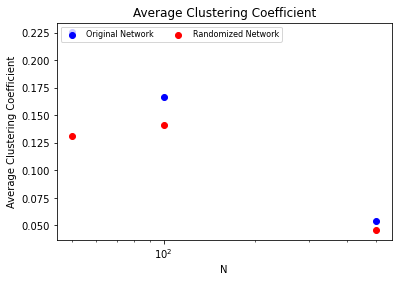

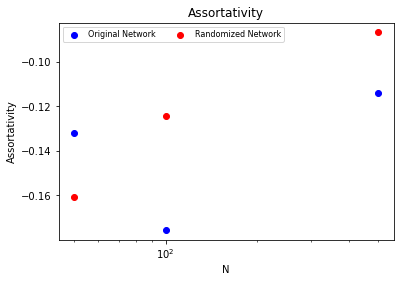

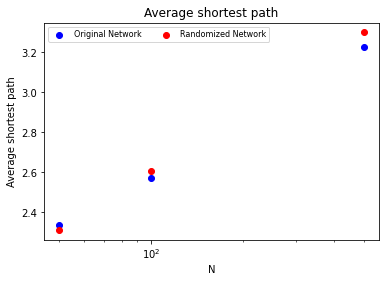

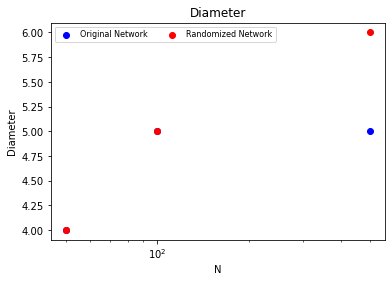

In [5]:
#task 2 

m = 3
N = [50, 100, 500]
list_avg_cluster_coefficient = []
list_rnd_avg_cluster_coefficient = []
list_assortativity = []
list_rnd_assortativity = []
list_avg_shortest_path = []
list_rnd_avg_shortest_path = []
list_diameter = []
list_rnd_diameter = []

for i in range(0, len(N)):
    G = nx.barabasi_albert_graph(N[i], m)
    G_rnd = nx.algorithms.smallworld.random_reference(G)
    
    avg_cluster_coefficient = nx.average_clustering(G)
    avg_cluster_coefficient_rnd = nx.average_clustering(G_rnd)
    list_avg_cluster_coefficient.append(avg_cluster_coefficient)
    list_rnd_avg_cluster_coefficient.append(avg_cluster_coefficient_rnd)
    print("Average assortativity coefficient for N =", N[i] ,"is: " + str(round(avg_cluster_coefficient, 4)))
    print("Average assortativity coefficient for randomized network of N =", N[i] ,"is: "+ str(round(avg_cluster_coefficient_rnd, 4)))
    
    assortativity = nx.degree_assortativity_coefficient(G)
    assortativity_rnd = nx.degree_assortativity_coefficient(G_rnd)
    list_assortativity.append(assortativity)
    list_rnd_assortativity.append(assortativity_rnd)
    print("Assortativity for N =", N[i] ,"is: " + str(round(assortativity, 4)))
    print("Assortativity for randomized network of N =", N[i] ,"is: "+ str(round(assortativity_rnd, 4)))
    
    avg_shortest_path = nx.average_shortest_path_length(G)
    avg_shortest_path_rnd = nx.average_shortest_path_length(G_rnd)
    list_avg_shortest_path.append(avg_shortest_path)
    list_rnd_avg_shortest_path.append(avg_shortest_path_rnd)
    print("Average shortest path for N =", N[i] ,"is: " + str(round(avg_shortest_path, 4)))
    print("Average shortest path for randomized network of N =", N[i] ,"is: "+ str(round(avg_shortest_path_rnd, 4)))
    
    diameter = nx.diameter(G)
    diameter_rnd = nx.diameter(G_rnd)
    list_diameter.append(diameter)
    list_rnd_diameter.append(diameter_rnd)
    print("Diameter for N =", N[i] ,"is: " + str(diameter))
    print("Diameter for randomized network of N =", N[i] ,"is: "+ str(diameter_rnd))
    print("\n")
    
plt.figure(1)
plt.title("Average Clustering Coefficient")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
original = plt.scatter(N, list_avg_cluster_coefficient, color = 'blue')
rnd = plt.scatter(N, list_rnd_avg_cluster_coefficient, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(2)
plt.title("Assortativity")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Assortativity")
plt.scatter(N, list_assortativity, color = 'blue')
plt.scatter(N, list_rnd_assortativity, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(3)
plt.title("Average shortest path")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Average shortest path")
plt.scatter(N, list_avg_shortest_path, color = 'blue')
plt.scatter(N, list_rnd_avg_shortest_path, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(4)
plt.title("Diameter")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Diameter")
plt.scatter(N, list_diameter, color = 'blue')
plt.scatter(N, list_rnd_diameter, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)